# SPOTIFY DATASET

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Importing necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
import json

In [4]:
df = pd.read_json('/content/drive/MyDrive/Datasets/Streaming_History_Audio_2022-2024_0.json', encoding='latin1')
df.head(20)

,ts,platform,ms_played,conn_country,ip_addr,master_metadata_track_name,master_metadata_album_artist_name,master_metadata_album_album_name,spotify_track_uri,episode_name,episode_show_name,spotify_episode_uri,reason_start,reason_end,shuffle,skipped,offline,offline_timestamp,incognito_mode
0,2022-07-27T08:31:43Z,"Android OS 10 API 29 (samsung, SM-A207F)",170504,KE,41.212.54.52,2NLuv (with Benziboy),Jenevieve,2NLuv (with Benziboy),spotify:track:1UlkeNTAI6j9xon4RcEVT2,None,None,None,clickrow,trackdone,False,False,False,NaN,False
1,2022-07-27T08:32:05Z,"Android OS 10 API 29 (samsung, SM-A207F)",20668,KE,41.212.54.52,2NLuv (with Benziboy),Jenevieve,2NLuv (with Benziboy),spotify:track:1UlkeNTAI6j9xon4RcEVT2,None,None,None,playbtn,endplay,False,False,False,NaN,False
2,2022-07-27T08:34:33Z,"Android OS 10 API 29 (samsung, SM-A207F)",147191,KE,41.212.54.52,Medallion,Jenevieve,Division,spotify:track:4SrzMsdRQaV5IzzHTg3s5M,None,None,None,clickrow,trackdone,False,False,False,NaN,False
3,2022-07-27T08:37:51Z,"Android OS 10 API 29 (samsung, SM-A207F)",197067,KE,41.212.54.52,Nxwhere,Jenevieve,Division,spotify:track:57KsIyoebEh9PdoESmxRx0,None,None,None,trackdone,trackdone,False,False,False,NaN,False
4,2022-07-27T08:40:30Z,"Android OS 10 API 29 (samsung, SM-A207F)",159265,KE,41.212.54.52,Eternal,Jenevieve,Division,spotify:track:34dNNN5cn8QxDub8sZbEKa,None,None,None,trackdone,trackdone,False,False,False,NaN,False
5,2022-07-27T08:43:29Z,"Android OS 10 API 29 (samsung, SM-A207F)",177702,KE,41.212.54.52,Midnight Charm,Jenevieve,Division,spotify:track:2aBDSH9Ix90YT0CrICIyYy,None,None,None,trackdone,trackdone,False,False,False,NaN,False
6,2022-07-27T08:46:35Z,"Android OS 10 API 29 (samsung, SM-A207F)",186061,KE,41.212.54.52,Blameless,Jenevieve,Division,spotify:track:407njhMg78uMVPQF7UjqzL,None,None,None,trackdone,trackdone,False,False,False,NaN,False
7,2022-07-27T08:47:00Z,"Android OS 10 API 29 (samsung, SM-A207F)",23057,KE,41.212.54.52,No Sympathy,Jenevieve,Division,spotify:track:0rNCPRSgQestO7fdR5jcii,None,None,None,trackdone,backbtn,False,False,False,NaN,False
8,2022-07-27T08:47:01Z,"Android OS 10 API 29 (samsung, SM-A207F)",770,KE,41.212.54.52,Blameless,Jenevieve,Division,spotify:track:407njhMg78uMVPQF7UjqzL,None,None,None,backbtn,fwdbtn,False,False,False,NaN,False
9,2022-07-27T08:50:08Z,"Android OS 10 API 29 (samsung, SM-A207F)",187454,KE,41.212.54.52,No Sympathy,Jenevieve,Division,spotify:track:0rNCPRSgQestO7fdR5jcii,None,None,None,fwdbtn,trackdone,False,False,False,NaN,False


In [5]:
# Save the data to an excel file
#df.to_excel("spotify2022.xlsx", index = False)
#print("Excel file saved successfully")

In [6]:
#import os
#print(os.getcwd())

In [7]:
# How many rows are there
df.shape[0]

19006

In [8]:
total_nan = df.isna().sum()
total_nan

,0
ts,0
platform,0
ms_played,0
conn_country,0
ip_addr,0
master_metadata_track_name,92
master_metadata_album_artist_name,92
master_metadata_album_album_name,92
spotify_track_uri,92
episode_name,18914


In [9]:
#df.shape["episode_name"]
#df[df["episode_name"].isna()]


# LISTENING PLATFORM

In [10]:
listening_platform = df['platform'].value_counts()  #counts how many times each dataset appears

# Display
print(listening_platform)

platform
android                                     15951
Android OS 10 API 29 (samsung, SM-A207F)     2764
windows                                       191
not_applicable                                100
Name: count, dtype: int64


# I listen to spotify on my phone more

# COUNTRY

In [11]:
listening_country = df['conn_country'].value_counts()

# Display
print(listening_country)

conn_country
KE    18897
TZ       98
GB       11
Name: count, dtype: int64


# LISTENING TIME

In [12]:
# Average listening time in minutes
# Convert the timestamp to datetime and extract the year
df['Date'] = pd.to_datetime(df['ts'])
df['Year'] = df['Date'].dt.year

# Calculate average listening time per day for each year
df['Listening_Time_Minutes'] = df['ms_played'] / (1000 * 60)  # Convert ms to minutes
daily_listening = df.groupby(['Year'])['Listening_Time_Minutes'].sum().reset_index()
average_listening_per_year = daily_listening.groupby('Year')['Listening_Time_Minutes'].mean()
print(average_listening_per_year)

Year
2022    11687.752917
2023    24964.655950
2024    10337.676317
Name: Listening_Time_Minutes, dtype: float64


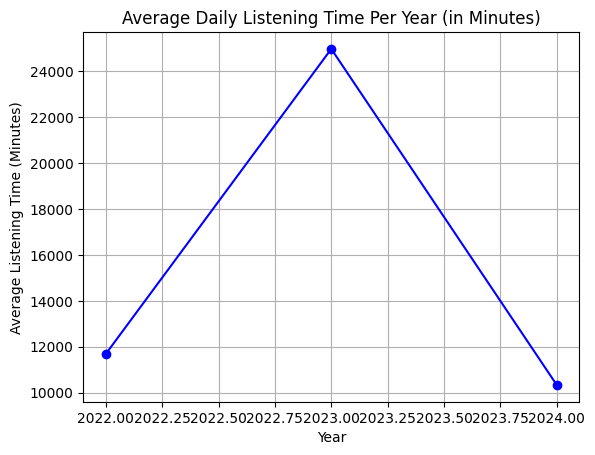

In [13]:
# Plot for average listening time
average_listening_per_year.plot(kind='line', marker='o', color='blue')
plt.title('Average Daily Listening Time Per Year (in Minutes)')
plt.xlabel('Year')
plt.ylabel('Average Listening Time (Minutes)')
plt.grid()
plt.show()


# TOP ARTIST IN A MONTH IN THE YEARS 2022-2024

# 2022

In [14]:
# TOP ARTIST IN A MONTH IN THE YEAR 2022 FROM JULY
# Extract columns
df['Date'] = pd.to_datetime(df['ts'])
df['Year'] = df['Date'].dt.year
df['Date'] = df['Date'].dt.tz_localize(None)  # Removes timezone info
df['Month'] = df['Date'].dt.to_period('M')  # Extract year-month
df['Artist'] = df['master_metadata_album_artist_name']
df['ms_played'] = df['ms_played']

# Filter data for the year 2022
df_2022 = df[df['Year'] == 2022]

# Group by Month and Artist
monthly_artist_data_2022 = df_2022.groupby(['Month', 'Artist'])['ms_played'].sum().reset_index()

# Sort by Month
top_artists_by_month_2022 = monthly_artist_data_2022.sort_values(['Month', 'ms_played'], ascending=[True, False])

# Get Top 10 Artists for each month
top_10_artists_per_month_2022 = top_artists_by_month_2022.groupby('Month').head(10)

# Display the results
for month in sorted(top_10_artists_per_month_2022['Month'].unique()):
    print(f"\nTop 10 Artists for {month}:")
    print(top_10_artists_per_month_2022[top_10_artists_per_month_2022['Month'] == month][['Artist', 'ms_played']])



Top 10 Artists for 2022-07:
          Artist  ms_played
0          Adele   10544588
16  Taylor Swift    7541094
17    The Weeknd    7143404
3     Bruno Mars    5779830
6    Don Toliver    4522260
12   Post Malone    3819200
9      Jenevieve    2421420
11   Mark Ronson     269699
5       Doja Cat     268765
2          B.o.B     268353

Top 10 Artists for 2022-08:
           Artist  ms_played
73        Mahalia   14685694
92   Taylor Swift   13301983
28     Bruno Mars    9184294
25  Ariana Grande    8242270
59         Kahu$h    6023149
19          Adele    5419418
41       Doja Cat    4072725
27    Bruno Major    3851323
60     Kanye West    3697958
23    Alicia Keys    3467164

Top 10 Artists for 2022-09:
           Artist  ms_played
275  Taylor Swift   19819557
129    Bruno Mars    9279870
155      Doja Cat    8139890
132   Call Me Ace    6977790
108   Alicia Keys    5312704
143   Chris Brown    5094796
121      BeyoncÃ©    4969600
179  JEONG SEWOON    4936298
194        Kahu$h    4319

# 2023

In [15]:
# TOP ARTIST IN A MONTH IN THE YEAR 2023
# Extract columns
df['Date'] = pd.to_datetime(df['ts'])
df['Year'] = df['Date'].dt.year
df['Date'] = df['Date'].dt.tz_localize(None)  # Removes timezone info
df['Month'] = df['Date'].dt.to_period('M')  # Extract year-month
df['Artist'] = df['master_metadata_album_artist_name']
df['ms_played'] = df['ms_played']

# Filter data for the year 2023
df_2023 = df[df['Year'] == 2023]

# Group by Month and Artist
monthly_artist_data_2023 = df_2023.groupby(['Month', 'Artist'])['ms_played'].sum().reset_index()

# Sort by Month
top_artists_by_month_2023 = monthly_artist_data_2023.sort_values(['Month', 'ms_played'], ascending=[True, False])

# Get Top 10 Artists for each month
top_10_artists_per_month_2023 = top_artists_by_month_2023.groupby('Month').head(10)

# Display the results
for month in sorted(top_10_artists_per_month_2023['Month'].unique()):
    print(f"\nTop 10 Artists for {month}:")
    print(top_10_artists_per_month_2023[top_10_artists_per_month_2023['Month'] == month][['Artist', 'ms_played']])



Top 10 Artists for 2023-01:
           Artist  ms_played
57   JEONG SEWOON    5346940
114       Rihanna    4774814
39          Drake    4046242
10            BTS    3578235
129    Steve Lacy    3495778
135    The Weeknd    3433807
9       BLACKPINK    3314148
119           SZA    3246548
94    Miley Cyrus    3246261
103      Omah Lay    3184246

Top 10 Artists for 2023-02:
            Artist  ms_played
165      BLACKPINK   12627367
257            SZA    9903100
252           Rema    6789965
158          Adele    5816207
231      Lyn Lapid    5758748
256        Ruth B.    5418867
174     Bruno Mars    5006784
268   Taylor Swift    4845461
163  Ariana Grande    4510883
212           Joji    3106783

Top 10 Artists for 2023-03:
           Artist  ms_played
422         imase   18287418
398           SZA    4953195
338          Joji    3959299
300          CHAI    3814329
390          Rema    3559644
339   Jordan Ward    3234159
305       Cardi B    3102694
368       Mahalia    3019973
319

# 2024

In [16]:
# TOP ARTIST IN A MONTH IN THE YEAR 2024
# Extract columns
df['Date'] = pd.to_datetime(df['ts'])
df['Year'] = df['Date'].dt.year
df['Date'] = df['Date'].dt.tz_localize(None)  # Removes timezone info
df['Month'] = df['Date'].dt.to_period('M')  # Extract year-month
df['Artist'] = df['master_metadata_album_artist_name']
df['ms_played'] = df['ms_played']

# Filter data for the year 2022
df_2024 = df[df['Year'] == 2024]

# Group by Month and Artist
monthly_artist_data_2024 = df_2024.groupby(['Month', 'Artist'])['ms_played'].sum().reset_index()

# Sort by Month
top_artists_by_month_2024 = monthly_artist_data_2024.sort_values(['Month', 'ms_played'], ascending=[True, False])

# Get Top 10 Artists for each month
top_10_artists_per_month_2024 = top_artists_by_month_2024.groupby('Month').head(10)

# Display the results
for month in sorted(top_10_artists_per_month_2024['Month'].unique()):
    print(f"\nTop 10 Artists for {month}:")
    print(top_10_artists_per_month_2024[top_10_artists_per_month_2024['Month'] == month][['Artist', 'ms_played']])



Top 10 Artists for 2024-01:
             Artist  ms_played
124      Stray Kids   16620396
12            Asake   14650756
106   Playboi Carti   11837328
25       Bruno Mars    5222901
6             Adele    4530635
70        Jung Kook    4394288
54   H_art the Band    4235395
17              BTS    4048746
46       Ed Sheeran    4041425
24         BeyoncÃ©    3741702

Top 10 Artists for 2024-02:
            Artist  ms_played
229          Drake   17780808
354     Stray Kids   12164323
181          Asake   11931156
200     Bruno Mars    9486412
331  Playboi Carti    7758844
283     Kanye West    7286127
353     Steve Lacy    6843702
367   Travis Scott    6224367
337           Rema    5708197
186      BLACKPINK    5321645

Top 10 Artists for 2024-03:
                Artist  ms_played
534           RADWIMPS    6582589
421         Bruno Mars    6375043
407              Asake    5699242
553         Stray Kids    5590208
456             Future    5213755
413          Baby Keem    5105476
487 

# SKIPPED TRACKS

In [17]:
# Skipped tracks
skipped_tracks = df[df['skipped'] == True].groupby('master_metadata_track_name').size().sort_values(ascending=False).head(50)
print("Most Skipped Tracks:")
print(skipped_tracks)


Most Skipped Tracks:
master_metadata_track_name
Dandelions                                                              36
This Life                                                               25
All Too Well (10 Minute Version) (Taylor's Version) (From The Vault)    24
GIFT - Eng Ver.                                                         24
Star Drawing                                                            23
Dynamite                                                                22
Star                                                                    22
Just Watching You                                                       21
Bad Habit                                                               21
Shelter (Feat. OFA)                                                     21
Romantic Sunday                                                         20
Stay                                                                    20
Here With Me                                        

# SHUFFLE ANALYSIS

In [18]:
# Shuffle mode analysis
shuffle_analysis = df.groupby('shuffle')['ms_played'].sum()
print("Listening Time: Shuffle vs Non-Shuffle:")
print(shuffle_analysis)

Listening Time: Shuffle vs Non-Shuffle:
shuffle
False    2273340187
True      546064924
Name: ms_played, dtype: int64


# TOTAL LISTENING TIME PER YEAR

In [19]:
#Total listening time per year
#Convert timestamp to date and time and extract the year
df['Date'] = pd.to_datetime(df['ts'])

#Aggregate total listening time per yaer
total_time_per_year = df.groupby('Year')['ms_played'].sum() / (1000 * 60 * 60)

#Results
print(total_time_per_year)

Year
2022    194.795882
2023    416.077599
2024    172.294605
Name: ms_played, dtype: float64


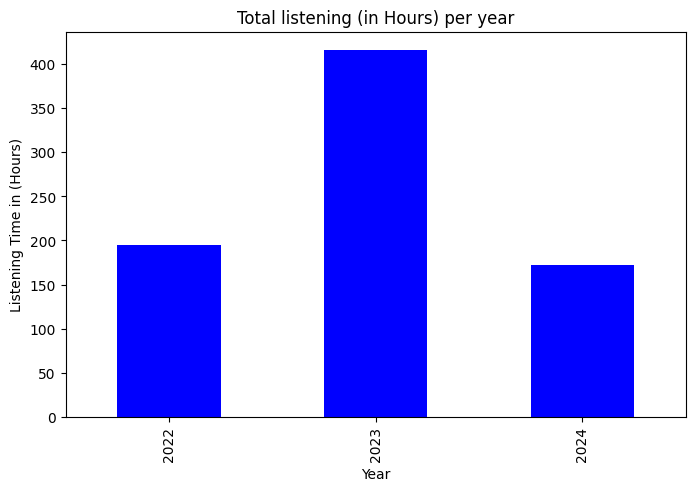

In [20]:
#visualize
total_time_per_year.plot(kind = 'bar', color = 'blue', figsize = (8, 5))
plt.title('Total listening (in Hours) per year')
plt.xlabel('Year')
plt.ylabel('Listening Time in (Hours)')
plt.show()

# 2023 had the highest listening of hours with 416.08

# ALBUMS WITH THE HIGHEST LISTENING

In [21]:
# Albums with the highest listening
# Filter out rows with missing album names
df_with_albums = df.dropna(subset=['master_metadata_album_album_name'])

# Group by album and sum listening time
album_insights = df_with_albums.groupby('master_metadata_album_album_name')['ms_played'].sum().sort_values(ascending=False).head(20)

# Convert ms to minutes and display
print(album_insights / (1000 * 60))  # Convert ms to minutes


master_metadata_album_album_name
5-STAR                                                      1016.180950
Lover                                                        935.626417
BORN PINK                                                    903.111150
Her Loss                                                     835.479517
SOS                                                          791.767050
Work Of Art                                                  776.314333
POP CUBE                                                     579.895283
UTOPIA                                                       525.604000
An Evening With Silk Sonic                                   509.539250
FORWARD                                                      501.958633
RENAISSANCE                                                  426.823200
Division                                                     399.407683
Planet Her                                                   398.267483
SMITHEREENS                    

# PODCASTS IN EACH YEAR

In [22]:
# Podcasts in all years

# drop Nan rows
podcast_data = df.dropna(subset=['episode_name'])

# Groupby episode and listening time
podcast_insights = podcast_data.groupby('episode_name')['ms_played'].sum().sort_values(ascending = False).head(20)

# Convert to minutes
podcast_insights_in_min = podcast_insights / (1000 * 60)

# Display
print(podcast_insights_in_min)

episode_name
Getting Up So God Can Bring You Out | Joel Osteen                                                                  55.850583
God Is Your Source | Joel Osteen                                                                                   55.847183
Let's discuss our failures!                                                                                        54.653167
An Expected End | Joel Osteen                                                                                      53.262150
Lisa Bilyeu ON: Train Your Confidence like a Muscle & Use These Simple Daily Habits to Succeed in Any Situation    47.351333
I took a mindfulness classâhere's what I learned                                                                 31.076033
Seizing Your God-Given Opportunities | Joel Osteen                                                                 29.562850
Awaken Your Great FaithÂ | Joel Osteen                                                                          

# PODCAST 2022

In [23]:
# Top podacast for 2022
# Convert the timestamp to datetime and extract the year
df['Date'] = pd.to_datetime(df['ts'])
df['Year'] = df['Date'].dt.year

# Filter for 2022 and episodes (podcasts)
podcast_data_2022 = df[(df['Year'] == 2022) & df['episode_name'].notna()]

# Group by episode name and sum the listening time
podcast_insights_2022 = podcast_data_2022.groupby('episode_name')['ms_played'].sum().sort_values(ascending=False)

# Convert to minutes
podcast_insights_2022_in_min = podcast_insights_2022 / (1000 * 60)

# Display
print(podcast_insights_2022_in_min)


episode_name
Getting Up So God Can Bring You Out | Joel Osteen                                                                  55.850583
God Is Your Source | Joel Osteen                                                                                   55.847183
An Expected End | Joel Osteen                                                                                      53.262150
Lisa Bilyeu ON: Train Your Confidence like a Muscle & Use These Simple Daily Habits to Succeed in Any Situation    47.351333
Seizing Your God-Given Opportunities | Joel Osteen                                                                 29.562850
Awaken Your Great FaithÂ | Joel Osteen                                                                             29.311300
The Power of Letting GoÂ | Joel Osteen                                                                             28.921733
God Will Bring You To A Flourishing Finish | Joel Osteen                                                        

# 2023

In [24]:
# Top podcast for 2023
# Convert the timestamp to datetime and extract the year
df['Date'] = pd.to_datetime(df['ts'])
df['Year'] = df['Date'].dt.year

# Filter for 2023 and episodes (podcasts)
podcast_data_2023 = df[(df['Year'] == 2023) & df['episode_name'].notna()]

# Group by episode name and sum the listening time
podcast_insights_2023 = podcast_data_2023.groupby('episode_name')['ms_played'].sum().sort_values(ascending=False)

# Convert to minutes
podcast_insights_2023_in_min = podcast_insights_2023 / (1000 * 60)

# Display
print(podcast_insights_2023_in_min)

episode_name
Let's discuss our failures!                                                                            54.653167
Staying Full of Hope | Joel Osteen                                                                     29.025067
Living in the Past or Yearning for the Future? Be Present.                                             28.694633
Make Plans To Succeed | Joel Osteen                                                                    28.507917
Don't Settle For Good Enough | Joel Osteen                                                             28.310267
Don't Rely On PeopleÂ | Joel Osteen                                                                    27.287933
Detoxing Your Mind | Joel Osteen                                                                       27.187100
Be Delusional and Do It Scared                                                                         26.146700
5 Ways To Build Your Confidence                                                    

# 2024

In [25]:
# Top podacast for 2024
# Convert the timestamp to datetime and extract the year
df['Date'] = pd.to_datetime(df['ts'])
df['Year'] = df['Date'].dt.year

# Filter for 2024 and episodes (podcasts)
podcast_data_2024 = df[(df['Year'] == 2024) & df['episode_name'].notna()]

# Group by episode name and sum the listening time
podcast_insights_2024 = podcast_data_2024.groupby('episode_name')['ms_played'].sum().sort_values(ascending=False)

# Convert to minutes
podcast_insights_2024_in_min = podcast_insights_2024 / (1000 * 60)

# Display
print(podcast_insights_2024_in_min)

episode_name
I took a mindfulness classâhere's what I learned                                                          31.076033
conquering your inner critic, breaking up with external validation & reinventing yourself ft. bella kaye    27.870550
100 lessons about life, relationships, success, wellness, and self-love [EPISODE #100]                      27.504017
5  traits that will instantly make you MAGNETIC                                                              6.807217
triggers = opportunities for growth                                                                          2.658150
Name: ms_played, dtype: float64


# REASONS A SONG STARTED

In [26]:
reason_start_counts = df['reason_start'].value_counts()

# Display
print(reason_start_counts)

reason_start
trackdone     11887
clickrow       4253
fwdbtn         2057
appload         320
backbtn         292
playbtn         148
trackerror       29
remote           20
Name: count, dtype: int64


# OFFLINE / ONLINE (TRUE or FALSE)

In [27]:
offline_counts = df['offline'].value_counts()

# Display
print(f"Online plays: {offline_counts.get(False, 0)}")
print(f"Offline plays: {offline_counts.get(True, 0)}")

Online plays: 12488
Offline plays: 6518


# So i play songs online than offline

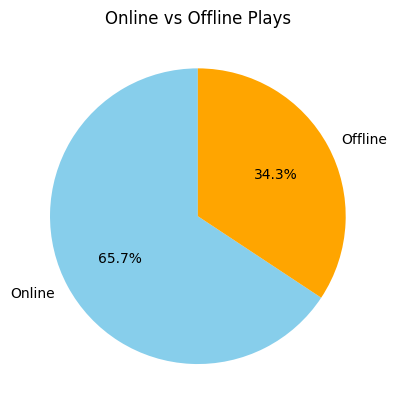

In [28]:
import matplotlib.pyplot as plt

labels = ['Online', 'Offline']
sizes = [offline_counts.get(False, 0), offline_counts.get(True, 0)]
colors = ['skyblue', 'orange']

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Online vs Offline Plays')
plt.show()


# PLAYTIME BY HOUR AND DAY OF THE WEEK

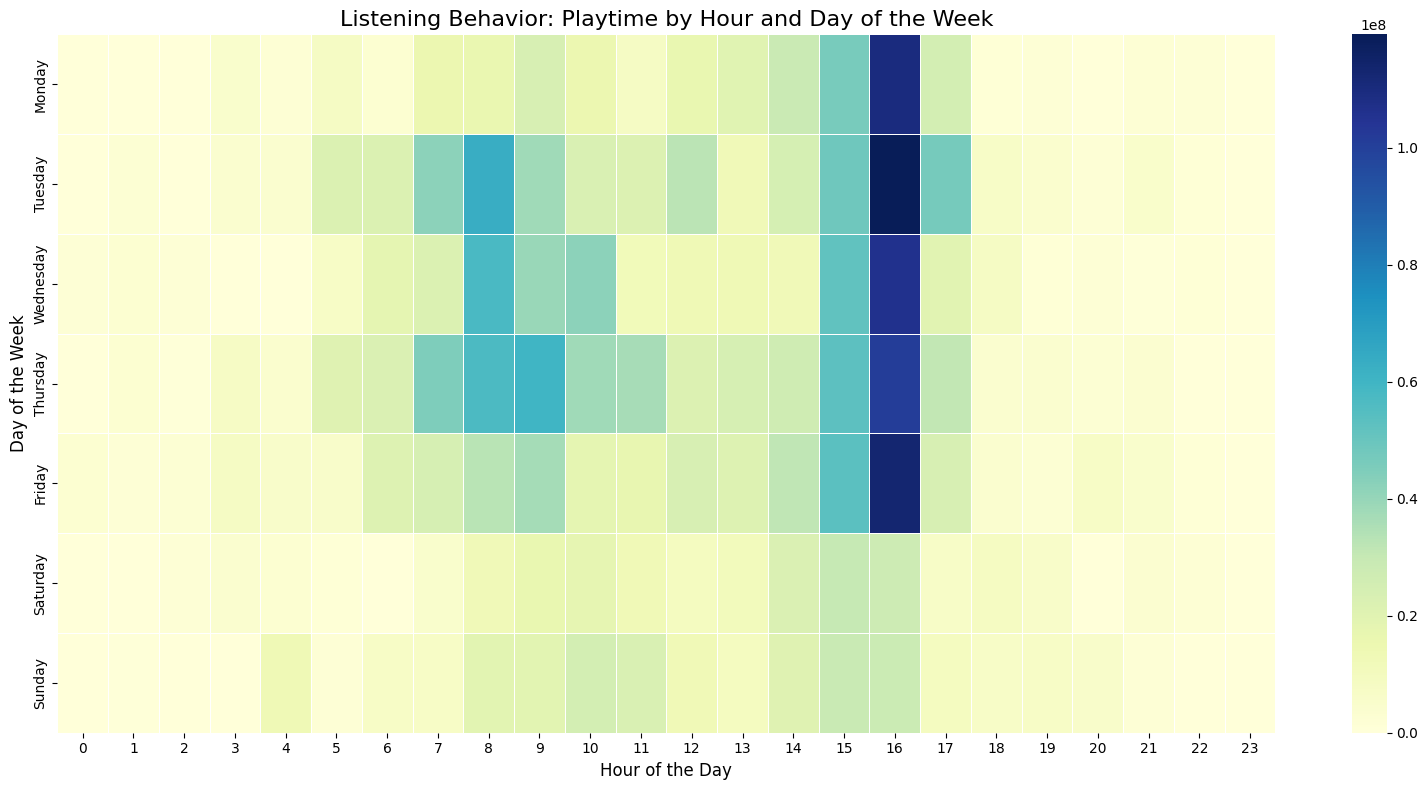

In [29]:
# Playtime by hour and day of the week
# Assuming 'df' is your cleaned DataFrame with a 'ts' column in datetime format
# Convert 'ts' column to datetime if it's not already in the correct format
df['ts'] = pd.to_datetime(df['ts'], errors='coerce')

# Add new columns for hour and day of the week
df['hour'] = df['ts'].dt.hour
df['day_of_week'] = df['ts'].dt.day_name()

# Aggregate playtime by hour and day of the week
heatmap_data = df.pivot_table(
    index='day_of_week', columns='hour', values='ms_played', aggfunc='sum', fill_value=0
)

# Reorder the days of the week for better readability
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
heatmap_data = heatmap_data.reindex(days_order)

# Create the heatmap
plt.figure(figsize=(16, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu', linewidths=0.5, annot=False, fmt=".0f")

# Add titles and labels
plt.title("Listening Behavior: Playtime by Hour and Day of the Week", fontsize=16)
plt.xlabel("Hour of the Day", fontsize=12)
plt.ylabel("Day of the Week", fontsize=12)
plt.tight_layout()

# Display the heatmap
plt.show()


# LISTENING STREAK

In [30]:
# This is a single-session streak, meaning you played songs back-to-back without long breaks.
# Ensure the data is sorted by timestamp
df = df.sort_values(by='ts')

# Calculate the time difference (in seconds) between consecutive plays
df['time_diff'] = df['ts'].diff().dt.total_seconds()

# Define a threshold for uninterrupted listening (e.g., 5 minutes = 300 seconds)
streak_threshold = 300

# Create a 'streak_id' column to group uninterrupted sessions
df['streak_id'] = (df['time_diff'] > streak_threshold).cumsum()

# Calculate the total playtime for each streak
streaks = df.groupby('streak_id')['ms_played'].sum()

# Convert playtime to minutes for readability
streaks_minutes = streaks / (1000 * 60)

# Find the longest listening streak
longest_streak_id = streaks.idxmax()
longest_streak_minutes = streaks_minutes[longest_streak_id]

# Extract details of the longest streak
longest_streak_details = df[df['streak_id'] == longest_streak_id]

# Display the results
print(f"Longest Listening Streak: {longest_streak_minutes:.2f} minutes")
print("Details of the longest streak:")
print(longest_streak_details[['ts', 'master_metadata_track_name', 'ms_played']])


Longest Listening Streak: 218.13 minutes
Details of the longest streak:
                           ts  \
744 2022-08-21 04:45:42+00:00   
743 2022-08-21 04:45:42+00:00   
742 2022-08-21 04:45:42+00:00   
740 2022-08-21 04:45:42+00:00   
739 2022-08-21 04:45:42+00:00   
..                        ...   
715 2022-08-21 04:45:42+00:00   
727 2022-08-21 04:45:42+00:00   
714 2022-08-21 04:45:42+00:00   
713 2022-08-21 04:45:42+00:00   
718 2022-08-21 04:45:42+00:00   

                          master_metadata_track_name  ms_played  
744                                         Daylight     260446  
743                      pushin P (feat. Young Thug)     136266  
742                                      No Sympathy     187413  
740                              When I Was Your Man     213826  
739  Roadside (+234 Remix) [feat. Rema & Ayra Starr]     198705  
..                                               ...        ...  
715                                        Good Days     279204  
727

# INACTIVE LISTENING PERIODS BY DAY OF WEEK

Total inactive periods: 138
                     start_date                  end_date inactive_day  \
442   2022-08-03 07:12:16+00:00 2022-08-05 18:20:54+00:00    Wednesday   
447   2022-08-05 18:33:45+00:00 2022-08-07 15:54:56+00:00       Friday   
564   2022-08-10 09:09:24+00:00 2022-08-11 10:37:22+00:00    Wednesday   
668   2022-08-14 21:10:34+00:00 2022-08-17 15:38:04+00:00       Sunday   
700   2022-08-17 16:44:29+00:00 2022-08-21 04:45:42+00:00    Wednesday   
...                         ...                       ...          ...   
18403 2024-04-09 17:29:58+00:00 2024-04-11 01:09:08+00:00      Tuesday   
18490 2024-04-12 16:51:56+00:00 2024-04-15 16:02:18+00:00       Friday   
18698 2024-04-18 17:58:37+00:00 2024-04-21 17:53:39+00:00     Thursday   
18872 2024-04-24 10:03:07+00:00 2024-04-27 08:29:14+00:00    Wednesday   
18892 2024-04-27 09:19:11+00:00 2024-04-29 16:23:16+00:00     Saturday   

       inactive_days  
442         2.464329  
447         1.889711  
564         1.

<ipython-input-31-19843872e264>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=inactive_periods['inactive_day'], order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], palette="coolwarm")


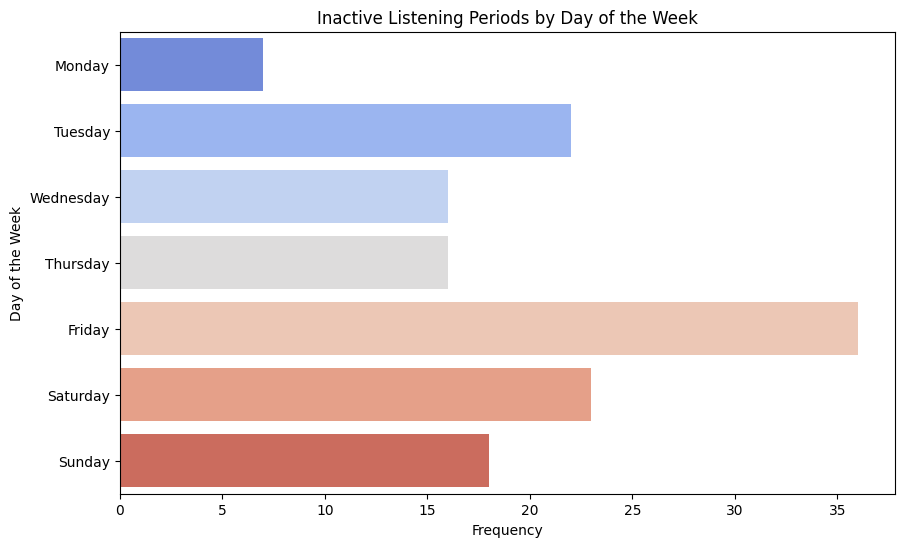

In [31]:
# Ensure the data is sorted by timestamp
df = df.sort_values(by='ts')

# Calculate the time difference between consecutive plays
df['time_diff'] = df['ts'].diff().dt.total_seconds()

# Define a threshold for inactivity (e.g., 1 day = 86400 seconds)
inactivity_threshold = 86400  # 1 day

# Identify periods of inactivity
inactive_periods = df[df['time_diff'] > inactivity_threshold].copy()

# Extract start and end dates for each inactive period
inactive_periods.loc[:, 'start_date'] = inactive_periods['ts'] - pd.to_timedelta(inactive_periods['time_diff'], unit='s')
inactive_periods.loc[:, 'end_date'] = inactive_periods['ts']

# Convert inactivity to days
inactive_periods.loc[:, 'inactive_days'] = inactive_periods['time_diff'] / (60 * 60 * 24)

# Extract the day of the week for when inactivity started
inactive_periods.loc[:, 'inactive_day'] = inactive_periods['start_date'].dt.day_name()

# Display results
print(f"Total inactive periods: {len(inactive_periods)}")
print(inactive_periods[['start_date', 'end_date', 'inactive_day', 'inactive_days']])

# 🔹 Visualizing Inactivity by Day of the Week
plt.figure(figsize=(10, 6))
sns.countplot(y=inactive_periods['inactive_day'], order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], palette="coolwarm")
plt.xlabel("Frequency")
plt.ylabel("Day of the Week")
plt.title("Inactive Listening Periods by Day of the Week")
plt.show()


# LISTENING BEHAVIOUR BY TIME OF DAY

<ipython-input-32-0bec93a59047>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=time_playtime.index, y=time_playtime.values, palette="coolwarm")


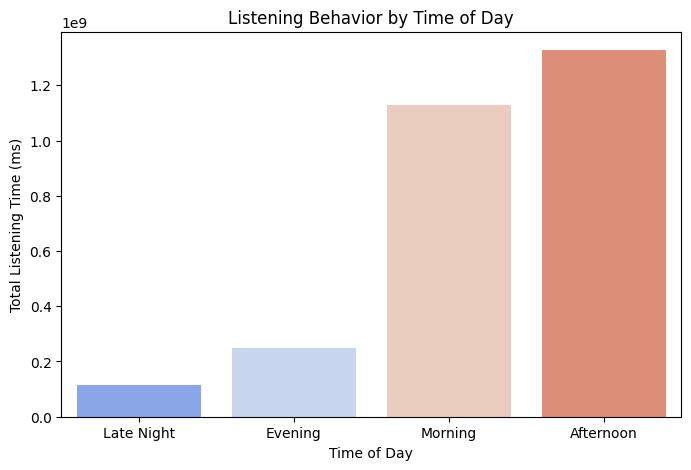

In [32]:
# Convert timestamp column to datetime
df['ts'] = pd.to_datetime(df['ts'])

# Extract hour from timestamp
df['hour'] = df['ts'].dt.hour

# Categorize time of day
def categorize_time(hour):
    if 5 <= hour < 12:
        return "Morning"
    elif 12 <= hour < 17:
        return "Afternoon"
    elif 17 <= hour < 21:
        return "Evening"
    else:
        return "Late Night"

df['time_of_day'] = df['hour'].apply(categorize_time)

# Aggregate playtime by time of day
time_playtime = df.groupby('time_of_day')['ms_played'].sum().sort_values()

# Plot listening behavior across time of day
plt.figure(figsize=(8, 5))
sns.barplot(x=time_playtime.index, y=time_playtime.values, palette="coolwarm")
plt.xlabel("Time of Day")
plt.ylabel("Total Listening Time (ms)")
plt.title("Listening Behavior by Time of Day")
plt.show()


# MOST REPLAYED SONGS BY TIME OF DAY

<ipython-input-33-7e6ee479d934>:21: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_replays = song_replays.groupby('time_of_day').apply(lambda x: x.nlargest(5, 'play_count')).reset_index(drop=True)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128 (\x80) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 149 (\x95) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 131 (\x83) missing from font(s) DejaVu Sans.
  fig.canvas.

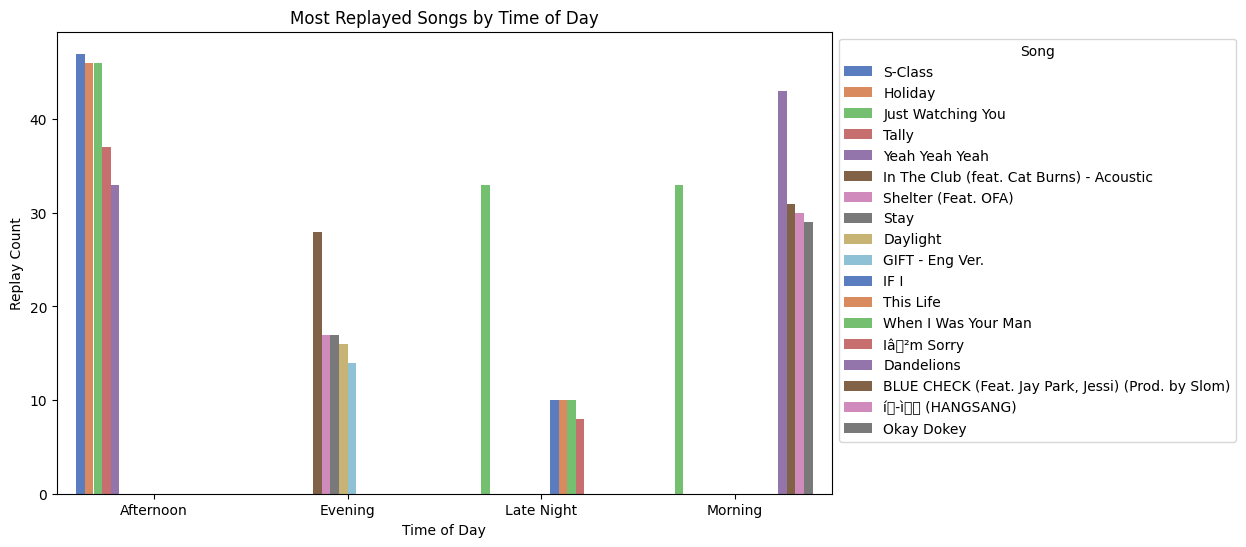

In [33]:
# Convert timestamp column to datetime
df['ts'] = pd.to_datetime(df['ts'])

# Extract hour from timestamp & categorize time of day
def categorize_time(hour):
    if 5 <= hour < 12:
        return "Morning"
    elif 12 <= hour < 17:
        return "Afternoon"
    elif 17 <= hour < 21:
        return "Evening"
    else:
        return "Late Night"

df['time_of_day'] = df['ts'].dt.hour.apply(categorize_time)

# Count how often each song is played in each time period
song_replays = df.groupby(['time_of_day', 'master_metadata_track_name']).size().reset_index(name='play_count')

# Get the most replayed songs per time period
top_replays = song_replays.groupby('time_of_day').apply(lambda x: x.nlargest(5, 'play_count')).reset_index(drop=True)

# 🔹 Visualization: Top Replayed Songs by Time of Day
plt.figure(figsize=(10, 6))
sns.barplot(data=top_replays, x='time_of_day', y='play_count', hue='master_metadata_track_name', palette="muted")
plt.xlabel("Time of Day")
plt.ylabel("Replay Count")
plt.title("Most Replayed Songs by Time of Day")
plt.legend(title="Song", bbox_to_anchor=(1, 1))
plt.show()


# NEW SONGS VS PLAYED OVER TIME

<ipython-input-34-ad8a2c06fa84>:3: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['year_month'] = df['ts'].dt.to_period('M')


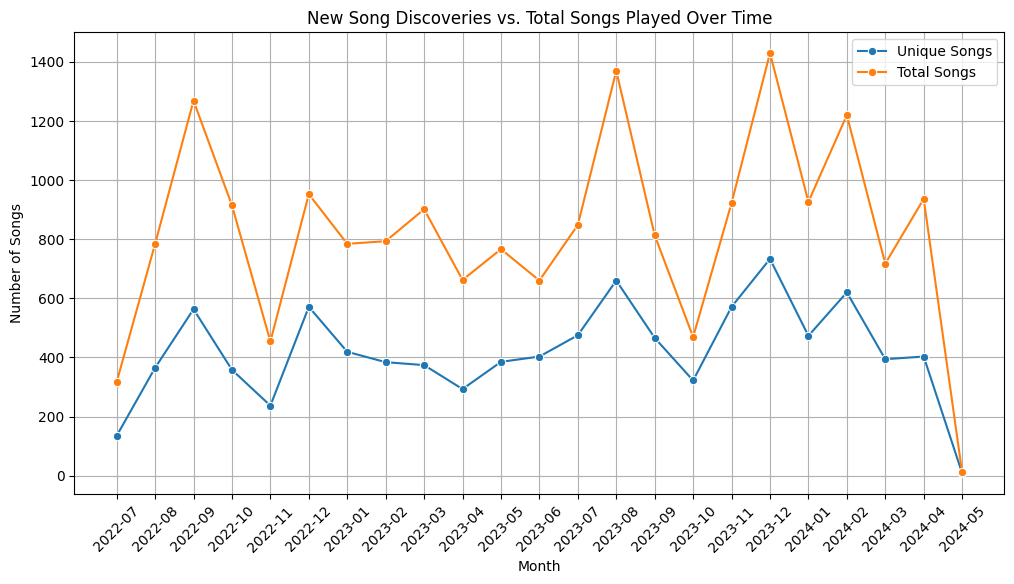

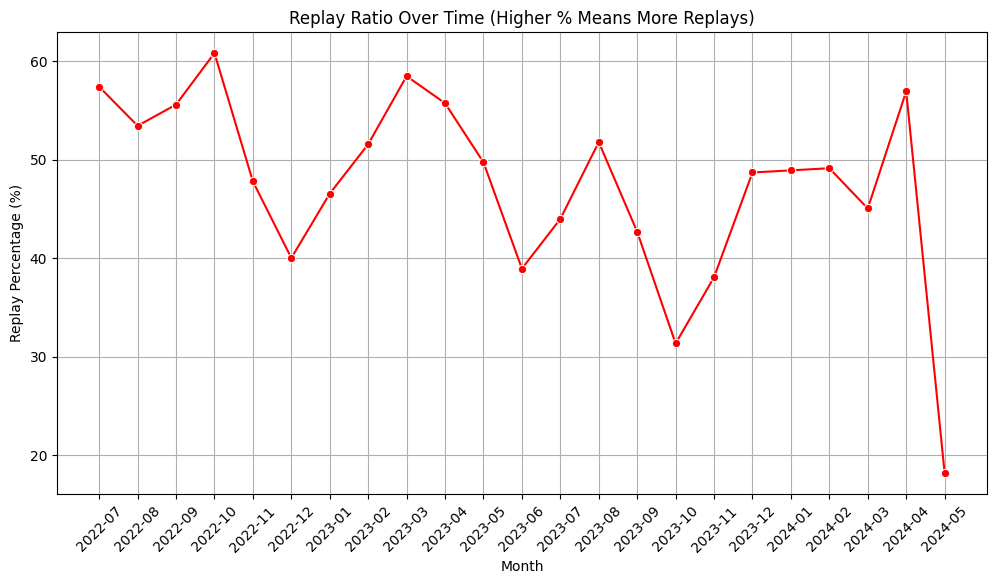

In [34]:
# Convert timestamp column to datetime and extract year-month
df['ts'] = pd.to_datetime(df['ts'])
df['year_month'] = df['ts'].dt.to_period('M')

# Count total unique songs played per month
unique_songs_per_month = df.groupby('year_month')['master_metadata_track_name'].nunique().reset_index()
unique_songs_per_month.rename(columns={'master_metadata_track_name': 'unique_songs'}, inplace=True)

# Count total songs played per month (includes repeats)
total_songs_per_month = df.groupby('year_month')['master_metadata_track_name'].count().reset_index()
total_songs_per_month.rename(columns={'master_metadata_track_name': 'total_songs'}, inplace=True)

# Merge the two datasets
song_trends = unique_songs_per_month.merge(total_songs_per_month, on='year_month')

# Calculate the percentage of new song discoveries
song_trends['replay_ratio'] = (1 - (song_trends['unique_songs'] / song_trends['total_songs'])) * 100

# 🔹 Plot: Unique vs. Total Songs Played Over Time
plt.figure(figsize=(12, 6))
sns.lineplot(x=song_trends['year_month'].astype(str), y=song_trends['unique_songs'], marker='o', label="Unique Songs")
sns.lineplot(x=song_trends['year_month'].astype(str), y=song_trends['total_songs'], marker='o', label="Total Songs")
plt.xticks(rotation=45)
plt.xlabel("Month")
plt.ylabel("Number of Songs")
plt.title("New Song Discoveries vs. Total Songs Played Over Time")
plt.legend()
plt.grid()
plt.show()

# 🔹 Plot: Replay Ratio Over Time
plt.figure(figsize=(12, 6))
sns.lineplot(x=song_trends['year_month'].astype(str), y=song_trends['replay_ratio'], marker='o', color='red')
plt.xticks(rotation=45)
plt.xlabel("Month")
plt.ylabel("Replay Percentage (%)")
plt.title("Replay Ratio Over Time (Higher % Means More Replays)")
plt.grid()
plt.show()
